## Firing rate changes in interneurons/pyramidal during SD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from neuropy.plotting import Fig 
import subjects

sessions = subjects.sd.ratJday1+subjects.sd.ratKday1

In [ ]:
%matplotlib widget
figure = Fig()
fig,gs = figure.draw(grid=(1,1),size=(4,4))
data = pd.DataFrame()
for sub, sess in enumerate(sessions):
    # print(sub)
    pre = sess.paradigm['pre']
    post = sess.paradigm['post']
    sd_period = [post[0],post[0]+5*3600] 
    neurons = sess.neurons.get_neuron_type('pyr')
    spktrns = neurons.spiketrains
    sd_bins = np.arange(post[0],post[0]+6*3600,3600)
    frate = np.asarray([np.histogram(spk,bins=sd_bins)[0] for spk in spktrns ])/3600
    # frate= np.log10(frate)
    mean_frate = np.mean(frate,axis=0)
    data = data.append(pd.DataFrame({'frate':frate.flatten(),'bins':list(np.arange(1,6))*frate.shape[0]}))

ax = plt.subplot(gs[0])
sns.boxplot(data=data,x='bins',y='frate',color='#ccc7c7',ax=ax)
# sns.swarmplot(data=data,x='bins',y='frate',color='k',ax=ax)
ax.set_xlabel('ZT (SD period)')
ax.set_title('Firing rating changes across sleep deprivation')





## Firing rate changes across session in SD and compare with NSD

Kamran's comment as observed from Miyawaki and Diba 2016 (Fig 1C)
> The animal is put on the track at 6am, and firing rates shoot up. In POST (next day’s light cycle) they start to come down. What happens to these firing rates in SD? In SD before Track, are they also high, or does it require TRack running?  And in NSD after track, do they come down, compared to SD after track?

The analysis below is for assesing that

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from plotUtil import Fig
import subjects


In [ ]:
%matplotlib widget
figure = Fig()
fig,gs = figure.draw(grid=(1,1),size=(4,4))
sessions = subjects.Sd().allsess + subjects.Nsd().allsess
data = pd.DataFrame()
for sub, sess in enumerate(sessions):

    tag = sess.recinfo.animal.tag
    try:
        maze = sess.epochs.maze
    except:
        maze = sess.epochs.maze1

    pre = sess.epochs.pre
    post = sess.epochs.post
    cells = sess.spikes.pyr

    pre_bins,pre_binsz = np.linspace(pre[0],pre[1],2,retstep=True)
    frate_pre = np.asarray([np.histogram(cell,bins=pre_bins)[0] for cell in cells])/pre_binsz

    maze_bins,maze_binsz = np.linspace(maze[0],maze[1],2,retstep=True)
    frate_maze = np.asarray([np.histogram(cell,bins=maze_bins)[0] for cell in cells])/maze_binsz

    sd_bins,sd_binsz = np.linspace(post[0],post[0]+5*3600,2,retstep=True)
    frate_sd = np.asarray([np.histogram(cell,bins=sd_bins)[0] for cell in cells])/sd_binsz


    post_bins,post_binsz = np.linspace(post[0]+5*3600,post[1],2,retstep=True)
    frate_post = np.asarray([np.histogram(cell,bins=post_bins)[0] for cell in cells])/post_binsz

    frate = np.hstack((frate_pre,frate_maze,frate_sd,frate_post))

    # frate= np.log10(frate)
    # mean_frate = np.mean(frate,axis=0)
    data = data.append(pd.DataFrame({'frate':frate.flatten(),'bins':list(np.arange(1,frate.shape[1]+1))*frate.shape[0]}))

data_mean = data.groupby('bins').mean()
data_sem = data.groupby('bins').sem(ddof=0)

ax = plt.subplot(gs[0])
# sns.lineplot(data=data,x='bins',y='frate',color='#ccc7c7',ax=ax,err_style='bars',ci=68)
ax.errorbar(data_mean.index.values,data_mean['frate'],yerr=data_sem['frate'],capsize=3,lw=2,color='k')
ax.axvspan(1,7,0,0.05,color='#968d8d')
ax.axvspan(7,16,0,0.05,color='#fadf80')
# ax.axvspan(7,16,0,0.05,color='#de5454')
# ax.axvspan(10,16,0,0.05,color='#de5454')
# sns.swarmplot(data=data,x='bins',y='frate',color='k',ax=ax)
ax.set_xlabel('ZT (SD period)')
ax.set_title('Firing rating changes across entire session')
ax.set_ylim([0.2,1])


In [ ]:
sess = subjects.Of().ratNday4[0]
sess.tracks.plot(['maze'])

## Pbe rate change across sleep deprivation

In [ ]:
import numpy as np
import subjects

sessions = (
    subjects.sd.ratJday1
    + subjects.sd.ratKday1
    + subjects.sd.ratNday1
    + subjects.sd.ratSday3
    + subjects.sd.ratRday2
)


In [ ]:
%matplotlib widget
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame()
for sub, sess in enumerate(sessions):

    # sd = sess.paradigm['sd']
    post = sess.paradigm['post']
    sd = [post[0],post[0]+5*3600]
    pbe_sd = sess.pbe.time_slice(sd[0],sd[1])
    bin_size= 600
    sd_bin = np.arange(sd[0],sd[1]+bin_size,bin_size)
    hist_pbe = np.histogram(pbe_sd.starts,bins=sd_bin)[0]

    df = df.append(pd.DataFrame({'n_pbe':hist_pbe/bin_size,'tbin':(sd_bin[:-1]-sd_bin[0])/3600,'sub':sub}))


pbe_mean = df.groupby('tbin').mean().n_pbe
pbe_sem= df.groupby('tbin').sem(ddof=0).n_pbe

fig,ax = plt.subplots()
# sns.lineplot(data=df,x='tbin',y='n_pbe')
ax.fill_between(pbe_mean.index,pbe_mean-pbe_sem,pbe_mean+pbe_sem,alpha=0.5)
ax.plot(pbe_mean.index,pbe_mean)
ax.set_xlabel('Zt time')
ax.set_ylabel('PBE rate (Hz)')

# Combined neuron type

In [1]:
import subjects
import numpy as np
from neuropy.utils import neurons_util

sessions = (
    subjects.sd.ratJday1
    + subjects.sd.ratKday1
    + subjects.sd.ratNday1
    + subjects.sd.ratSday3
    + subjects.sd.ratRday2
    + subjects.nsd.ratJday2
    + subjects.nsd.ratKday2
    +subjects.nsd.ratNday2
    + subjects.nsd.ratSday2

)


In [2]:
%matplotlib widget
neurons=[]
for sess in sessions:
    neurons.append(sess.neurons)

neuron_type= neurons_util.estimate_neuron_type(neurons)

for sub,sess in enumerate(sessions):
    sess.neurons.neuron_type = neuron_type[sub]
    sess.neurons.filename = sess.filePrefix.with_suffix('.neurons')
    sess.neurons.save()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

data saved
data saved


# Distribution of pairwise correlations during SD from first to last hour of SD
- also compare with nsd 1st hour of sleep vs 5th hour sleep

In [1]:
import numpy as np
import subjects
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from neuropy.plotting import Fig
sessions_sd= (
    subjects.sd.ratJday1
    + subjects.sd.ratKday1
    + subjects.sd.ratNday1
    + subjects.sd.ratSday3
    + subjects.sd.ratRday2
)

sessions_nsd=(
    subjects.nsd.ratJday2
    + subjects.nsd.ratKday2
    + subjects.nsd.ratNday2
    + subjects.nsd.ratSday2
)


/home/bapung/miniconda3/envs/data_analysis/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/bapung/miniconda3/envs/data_analysis/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/bapung/miniconda3/envs/data_analysis/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/bapung/miniconda3/envs/data_analysis/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/bapung/miniconda3/envs/data_analysis/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/bapung/miniconda3/envs/data_analysis/lib/python3.9/site-packages/numpy/lib

Text(0, 0.5, 'Probability')

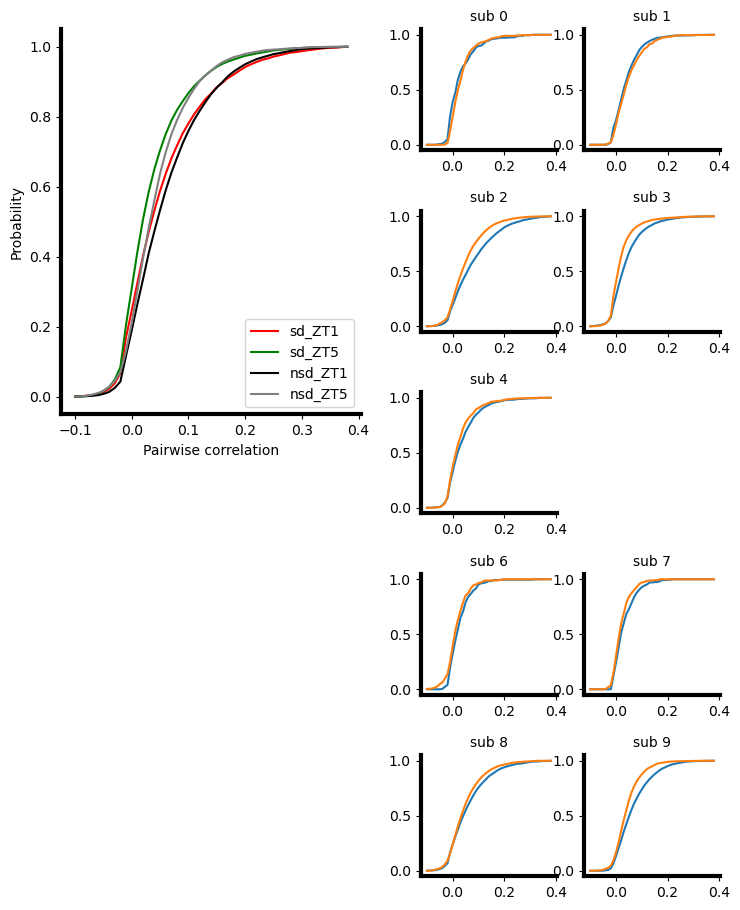

In [3]:
%matplotlib inline
figure = Fig()
fig,gs = figure.draw(grid=(2,2),style='Pres')
gs_ = figure.subplot2grid(gs[:,1],grid=(5,2),hspace=0.5)
all_corr_sd = []

cdf = lambda x: np.cumsum(x)/np.sum(x)

bins = np.arange(-0.1,0.4,0.01)
for sub, sess in enumerate(sessions_sd):
    post = sess.paradigm['post']
    sd = [post[0],post[0]+5*3600]

    neurons = sess.neurons.get_neuron_type('pyr')
    cal_pair_corr=lambda t:neurons.get_binned_spiketrains(t_start=t,t_stop=t+3600).get_pairwise_corr()
    corr_pair = np.asarray( [cal_pair_corr(_) for _ in [sd[0],sd[0]+4*3600]])
    f_h = np.histogram(corr_pair[0],bins=bins)[0]
    l_h = np.histogram(corr_pair[1],bins=bins)[0]

    ax = plt.subplot(gs_[sub])
    ax.plot(bins[:-1],cdf(f_h))
    ax.plot(bins[:-1],cdf(l_h))
    ax.set_title(f'sub {sub}')

    all_corr_sd.append(corr_pair)

all_corr_nsd=[]
for sub, sess in enumerate(sessions_nsd,sub+2):
    post = sess.paradigm['post']

    neurons = sess.neurons.get_neuron_type('pyr')
    cal_pair_corr=lambda t:neurons.get_binned_spiketrains(t_start=t,t_stop=t+3600).get_pairwise_corr()
    corr_pair = np.asarray( [cal_pair_corr(_) for _ in [post[0],post[0]+4*3600]])
    f_h = np.histogram(corr_pair[0],bins=bins)[0]
    l_h = np.histogram(corr_pair[1],bins=bins)[0]

    ax = plt.subplot(gs_[sub])
    ax.plot(bins[:-1],cdf(f_h))
    ax.plot(bins[:-1],cdf(l_h))
    ax.set_title(f'sub {sub}')

    all_corr_nsd.append(corr_pair)




ax = plt.subplot(gs[0])
all_corr_sd = np.hstack(all_corr_sd)
first_h_sd = np.histogram(all_corr_sd[0],bins=bins)[0]
last_h_sd = np.histogram(all_corr_sd[1],bins=bins)[0]

all_corr_nsd = np.hstack(all_corr_nsd)
first_h_nsd = np.histogram(all_corr_nsd[0],bins=bins)[0]
last_h_nsd = np.histogram(all_corr_nsd[1],bins=bins)[0]

ax.plot(bins[:-1],cdf(first_h_sd),'r',label='sd_ZT1')
ax.plot(bins[:-1],cdf(last_h_sd),'g',label='sd_ZT5')
ax.plot(bins[:-1],cdf(first_h_nsd),'k',label='nsd_ZT1')
ax.plot(bins[:-1],cdf(last_h_nsd),'gray',label='nsd_ZT5')

ax.legend()
ax.set_xlabel('Pairwise correlation')
ax.set_ylabel('Probability')